# Problema 1

## 1. Configurando el entorno de trabajo

### 1.1. Importar librerías necesarias

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 1.2. Importar dataset

In [80]:
# Cargar el dataset
data = pd.read_csv("Student_Performance.csv")

# Mostrar las primeras filas del dataset
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


El dataset incluye las siguientes variables para cada estudiante:
* **Hours Studied**: El número total de horas dedicadas al estudio por cada estudiante.
Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.

* **Extracurricular Activities**: Si el estudiante participa en actividades extracurriculares (Sí o No).

* **Sleep Hours**: El número promedio de horas de sueño que el estudiante tuvo por día.

* **Sample Question Papers Practiced**: El número de cuestionarios de muestra que el estudiante practicó.

El dataset incluye la variable objetivo:

* **Performance Index**: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

## 2. Análisis de datos y preprocesamiento

### 2.1. Análisis

#### 2.1.1. Información básica del dataset

In [81]:
# Verificar la forma del dataset
print("Forma del dataset:", data.shape)

# Verificar los tipos de datos y los valores faltantes
data.info()

# Estadísticas de resumen para columnas numéricas
data.describe()

Forma del dataset: (10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


1. Información básica:

  * El dataset contiene 10,000 entradas y 6 columnas.
  * No hay valores faltantes en ninguna de las columnas

  * **Tipos de datos**:
    * Hours Studied, Previous Scores, Sleep Hours, Sample Question Papers Practiced: int64
    * Extracurricular Activities: object (string para pandas)
    * Performance Index: float64

2. Summary Statistics:
  * **Hours Studied**:
    * Mean: 4.9929
    * Standard Deviation: 2.5893
    * Minimum: 1, Maximum: 9
  * **Previous Scores**:
    * Mean: 69.4457
    * Standard Deviation: 17.3432
    * Minimum: 40, Maximum: 99
  * **Sleep Hours**:
    * Mean: 6.5306
    * Standard Deviation: 1.6959
    * Minimum: 4, Maximum: 9
  * **Sample Question Papers Practiced**:
    * Mean: 4.5833
    * Standard Deviation: 2.8673
    * Minimum: 0, Maximum: 9
  * **Performance Index**:
    * Mean: 55.2248
    * Standard Deviation: 19.2126
    * Minimum: 10, Maximum: 100

#### 2.1.2 Visualización de variables

##### 2.1.2.1. Distribución de variables escalares discretas

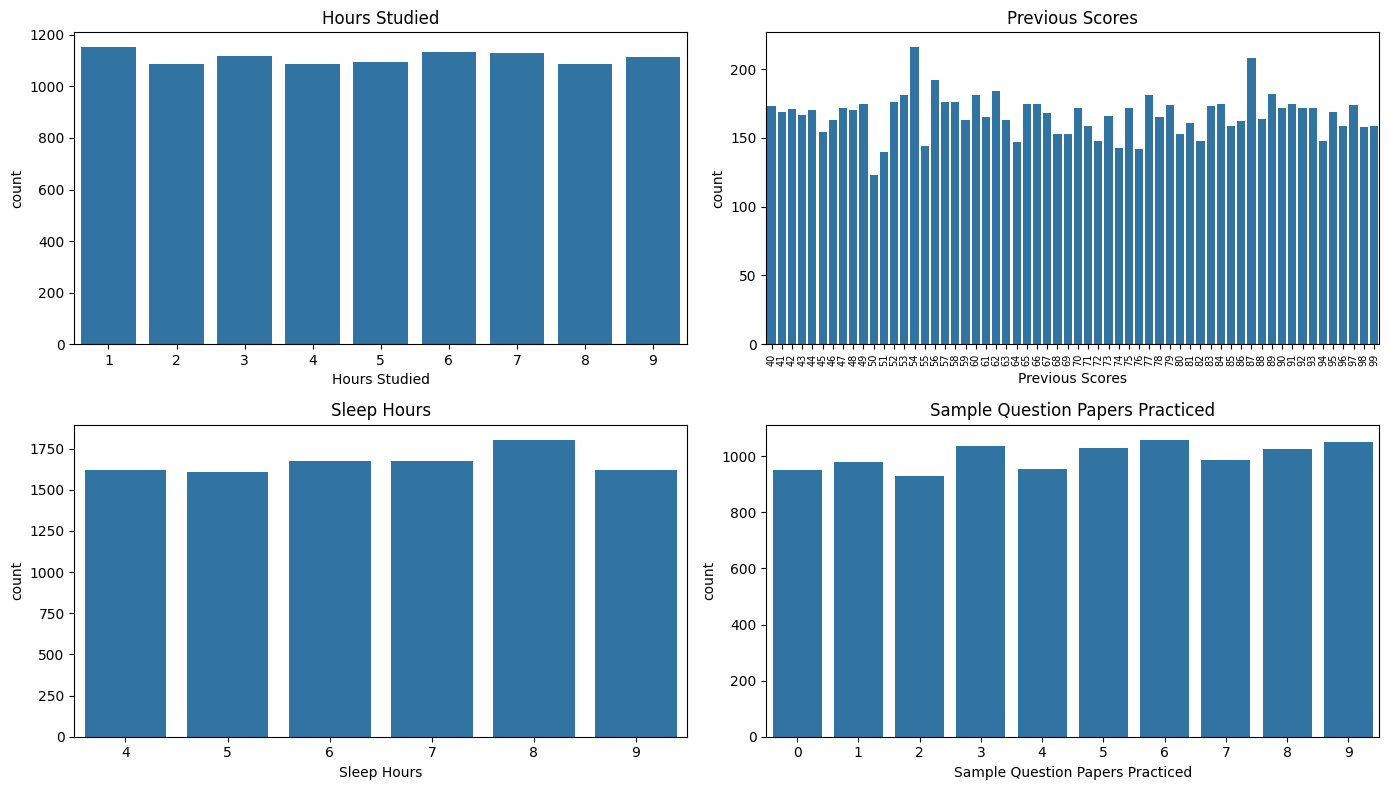

In [82]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot for Hours Studied
sns.countplot(data=data, x='Hours Studied', ax=axes[0, 0])
axes[0, 0].set_title('Hours Studied')

# Plot for Previous Scores with rotated x-axis labels
sns.countplot(data=data, x='Previous Scores', ax=axes[0, 1])
axes[0, 1].set_title('Previous Scores')
axes[0, 1].tick_params(axis='x', rotation=90, labelsize=7)

# Plot for Sleep Hours
sns.countplot(data=data, x='Sleep Hours', ax=axes[1, 0])
axes[1, 0].set_title('Sleep Hours')

# Plot for Sample Question Papers Practiced
sns.countplot(data=data, x='Sample Question Papers Practiced', ax=axes[1, 1])
axes[1, 1].set_title('Sample Question Papers Practiced')

# Adjust layout
plt.tight_layout()
plt.show()

Las distribuciones de las variables escalares discretas lucen aceptablemente uniformes.

##### 2.1.2.2.  Distribución de la variable categórica

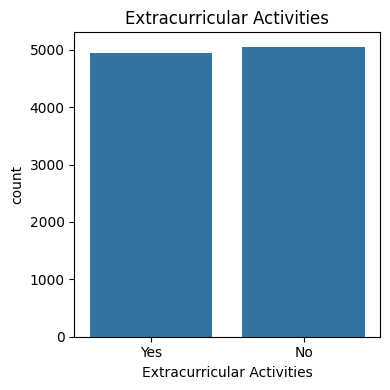

In [83]:
# Set up the figure and axes
plt.figure(figsize=(4, 4))

# Plot for Extracurricular Activities
sns.countplot(data=data, x='Extracurricular Activities')
plt.title('Extracurricular Activities')

# Adjust layout
plt.tight_layout()
plt.show()

La variable categórica se muestra aceptablemente balanceada

##### 2.1.2.3. Distribución de la variable escalar continua y variable objetivo.

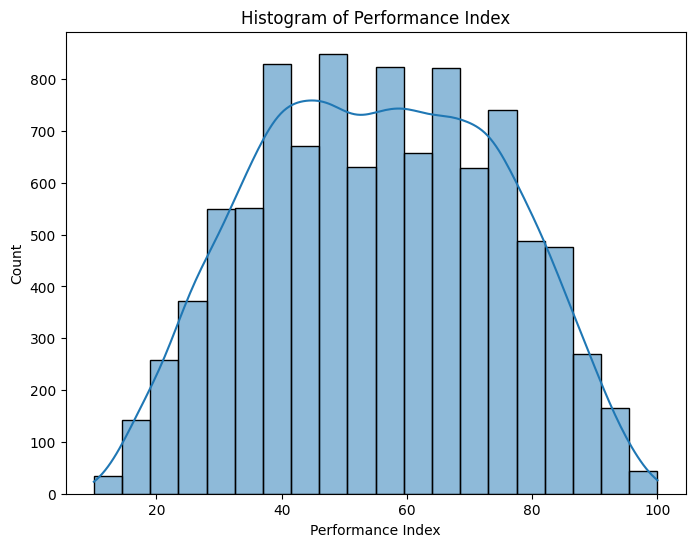

In [84]:
# Set up the figure and axes
plt.figure(figsize=(8, 6))

# Plot histogram for Performance Index
sns.histplot(data=data, x='Performance Index', bins=20, kde=True)
plt.title('Histogram of Performance Index')

# Show plot
plt.show()

La variable objetivo muestra una distribución más parecida a una normal.

##### 2.1.2.4. Correlación entre las variables numéricas

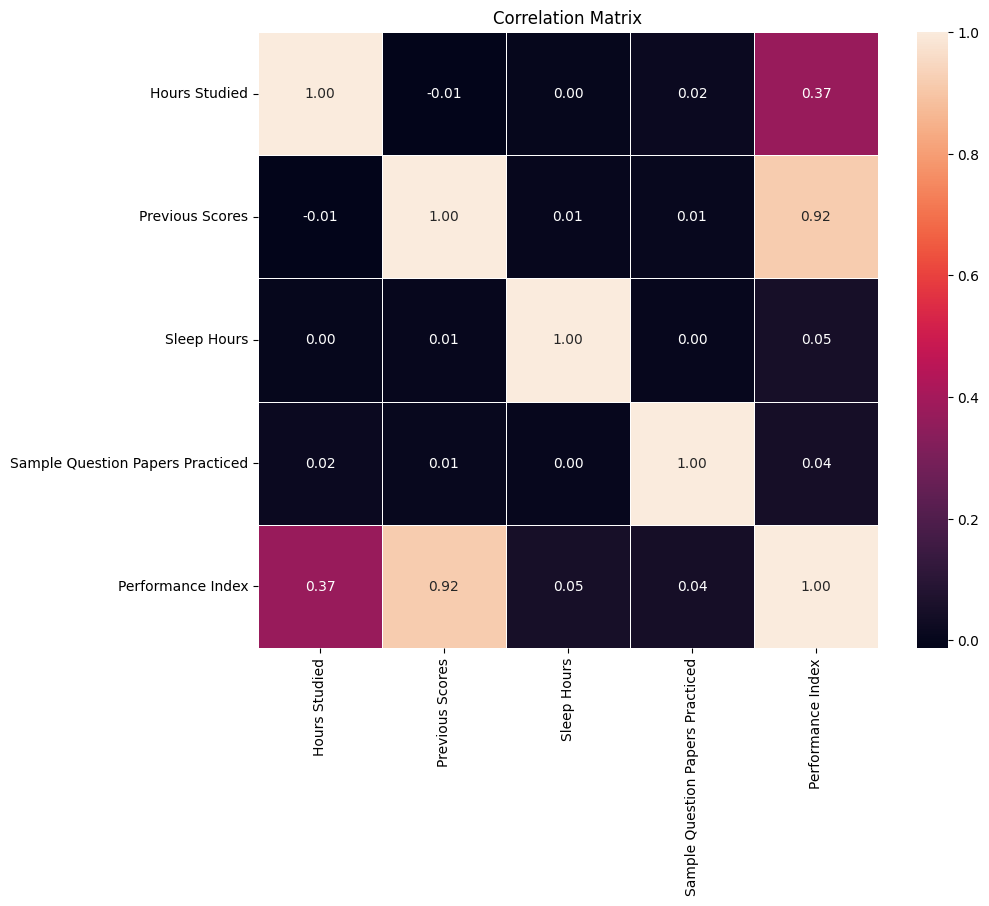

In [85]:
# Excluir la variable "Extracurricular Activities"
numeric_data = data.drop(columns=['Extracurricular Activities'])

# Compute the correlation matrix
corr = numeric_data.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))

# Plot the correlation matrix as a heatmap with the rocket palette
sns.heatmap(corr, annot=True, cmap='rocket', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()

Sólo se observa una alta correlación entre el índice de rendimiento y los puntajes previos

### 2.2. Preprocesamiento


#### 2.2.1. Codificación de la variable categóricas

In [86]:
# Convertir 'Extracurricular Activities' a valores núméricos (1 para Yes, 0 para No)
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

#### 2.2.2. Separar el dataset en sets de train y test y el train, a su vez, en train y validation

In [87]:
# Dividir el dataset en características y variable objetivo
X = data.drop(columns=['Performance Index'])
y = data['Performance Index']

# Dividir el dataset en sets de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el set de entrenemiento en sets de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

#### 2.2.3. Normalizar variables numéricas

In [88]:
# Inicializar el scaler
scaler = MinMaxScaler()

# Normalizar las variables por separado para training, validation, y testing
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

#### 2.2.4. Observar el resultado del procesamiento en el set de train

In [89]:
# Verificar los tipos de datos y los valores faltantes
X_train.info()

# Estadísticas de resumen para columnas numéricas
X_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 8588 to 6090
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     6000 non-null   float64
 1   Previous Scores                   6000 non-null   float64
 2   Extracurricular Activities        6000 non-null   int64  
 3   Sleep Hours                       6000 non-null   float64
 4   Sample Question Papers Practiced  6000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 281.2 KB


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.498688,0.501302,0.490500,0.510400,0.509296
std,0.323639,0.293025,0.499951,0.340281,0.316885
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.254237,0.000000,0.200000,0.222222
50%,0.500000,0.508475,0.000000,0.600000,0.555556
75%,0.750000,0.762712,1.000000,0.800000,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000


Aquí se puede observar como todas las variables no-objetivo se ecuentran en el intervalo [0,1]. La variable objetivo se encuentra en un rango aceptable [10,100] por lo que no creemos necesario normalizarla.

## 3. Definir y entrenar el modelo

### 3.1. Definir el modelo

La arquitectura elegida es una red neuronal Feedfoward con una capa de entrada con 64 neuronas, una capa oculta adicional con 32 neuronas y una capa de salida con una neurona.

Estamos usando la función de activación ReLU para las capas ocultas y la activación lineal para la capa de salida, ya que es una tarea de regresión.

El modelo se compila con el optimizador Adam y la función de pérdida de error cuadrático medio. También estamos monitoreando el error absoluto medio (MAE) como métrica.

In [90]:
# Definir el modelo
model = Sequential()

# Añadir la capa de entrada
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Añadir la capa oculta
model.add(Dense(32, activation='relu'))

# Añadir la capa de salida
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Mostrar el resumen del modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                384       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3.2. Entrenar el modelo
Entrenaremos el modelo mediante entrenamiento por lotes, donde los datos de entrenamiento se dividen en lotes más pequeños para actualizar los pesos del modelo de forma iterativa.

También implementaremos early stopping para evitar el sobreajuste monitoreando la pérdida de validación y deteniendo el entrenamiento cuando deje de mejorar.

Entrenaremos el modelo para un máximo de 100 épocas, con un tamaño de lote de 32. La detención anticipada se aplica con una paciencia de 5 épocas, lo que significa que el entrenamiento se detendrá si la pérdida de validación no mejora durante 5 épocas consecutivas. El parámetro recovery_best_weights=True restaura los pesos del modelo a los mejores encontrados durante el entrenamiento.


In [91]:
# Definir el criterio de early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
188/188 [==============================] - 2s 4ms/step - loss: 1963.5565 - mae: 37.8069 - val_loss: 206.6199 - val_mae: 11.8924
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 122.8542 - mae: 9.0203 - val_loss: 56.7013 - val_mae: 6.3020
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 20.9864 - mae: 3.5959 - val_loss: 7.0415 - val_mae: 2.1114
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 5.4087 - mae: 1.8462 - val_loss: 4.3989 - val_mae: 1.6678
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 4.4377 - mae: 1.6717 - val_loss: 4.2333 - val_mae: 1.6368
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 4.3151 - mae: 1.6489 - val_loss: 4.1324 - val_mae: 1.6175
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 4.3007 - mae: 1.6425 - val_loss: 4.0909 - val_mae: 1.6081
Epoch 8/100
188/188 [==============================] - 1s 

#### 3.2.1. Graficar curvas de pérdida en entrenamiento y validación

Después del entrenamiento, graficamos las curvas de pérdida de entrenamiento y validación para evaluar el rendimiento del modelo durante el entrenamiento.

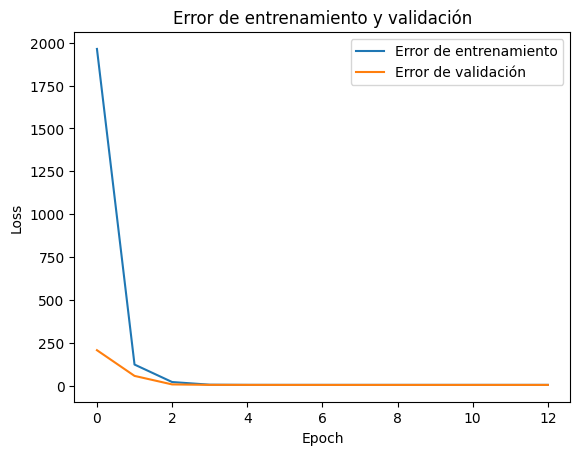

In [92]:
# Graficar las curvas de error de entrenamiento y validación
plt.plot(history.history['loss'], label='Error de entrenamiento')
plt.plot(history.history['val_loss'], label='Error de validación')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Error de entrenamiento y validación')
plt.legend()
plt.show()

## 3. Evaluar resultados del modelo

### 3.1. Métricas

In [93]:
# Predecir en el set de testing
y_pred = model.predict(X_test)

# Calcular MSE, RMSE, MAE, y R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R²): {r2:.2f}')

63/63 [==============================] - 0s 2ms/step
Root Mean Squared Error (RMSE): 2.03
Mean Absolute Error (MAE): 1.62
R-squared (R²): 0.99


**Error cuadrático medio (RMSE): 2,02**
  * RMSE es la raíz cuadrada de MSE y mide la magnitud promedio del error. Está en la misma unidad que la variable a predecir. Con un RMSE de 2,02, las predicciones del modelo están, en promedio, dentro de aproximadamente 2,02 unidades de los valores reales. Podemos decir que es relativamente bajo teninedo en cuenta los que la variable a predecir se encuentra en el rango (10,100),

**Error absoluto medio (MAE): 1,61**
  * MAE mide la diferencia absoluta promedio entre los valores previstos y reales. Proporciona una medida del error más interpretable en comparación con MSE. Un MAE de 1,61 sugiere que, en promedio, las predicciones del modelo están equivocadas en aproximadamente 1,61 unidades.

**R cuadrado (R²): 0,99**
  * R cuadrado mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de R cuadrado cercano a 1 indica que el modelo explica una gran proporción de la varianza en la variable objetivo. Con un R² de 0,99, el modelo explica el 99% de la varianza del índice de rendimiento, lo cual es excelente.

En general, estos resultados sugieren que el modelo funciona excepcionalmente bien en la predicción del índice de rendimiento académico de los estudiantes en función de las características proporcionadas.

## 3.1. Gráficas

#### 3.1.1. Scatter plot de valores reales vs predichos

Este gráfico compara los valores reales del índice de rendimiento con los valores predichos. Idealmente, los puntos deberían alinearse a lo largo de la línea diagonal, lo que indica que las predicciones están cerca de los valores reales.

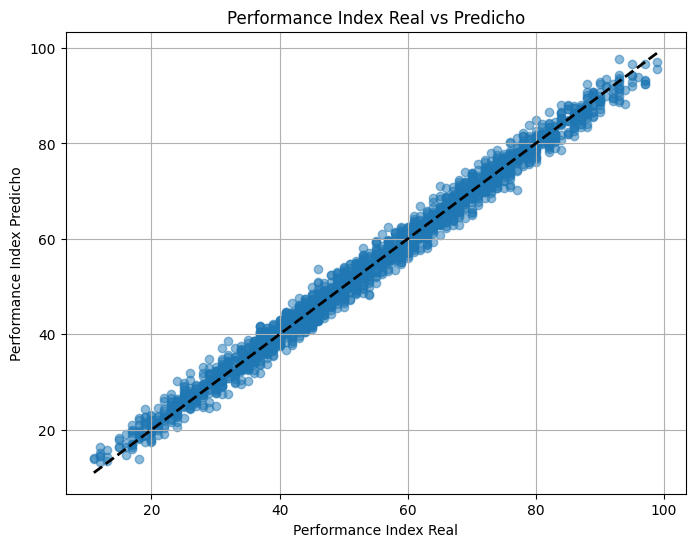

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Performance Index Real')
plt.ylabel('Performance Index Predicho')
plt.title('Performance Index Real vs Predicho')
plt.grid(True)
plt.show()

Los valores se acomodan muy cerca de la diagonal, es decir, los valores predichos están muy cerca de los reales. Esto muestra la buena calidad de la predicción.

#### 3.1.2. Gráfico de residuos

Este gráfico muestra la distribución de los residuos (las diferencias entre los valores reales y previstos) frente a los valores previstos. Idealmente, los residuos deberían distribuirse uniformemente alrededor de la línea horizontal en 0, lo que indica que las predicciones del modelo no tienen sesgo.

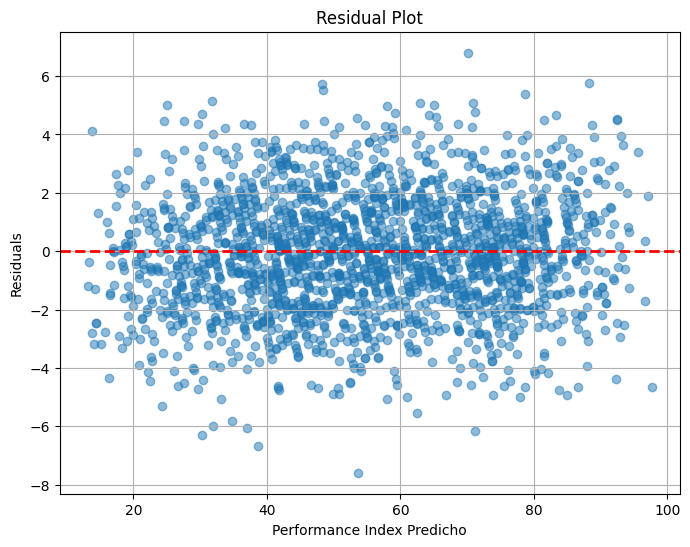

In [95]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Performance Index Predicho')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

Se puede observar que la mayoría de los residuos se acomodan de menera homogénea a lo largo de la constante igual a cero, por lo tanto, el modelo no presenta un sesgo hacia la predicción de cierto índice de rendimiento.